# Time series

Basic concepts:

| Term | Definition |
| - | - |
| Time series | Any data that are indexed by time. |
| Forecasting | Predicting the values for data points with the future time (i.e. time that hasn't been seen at training). |

Components of time series:
- **Level**
  - Basically horisontal lines at different levels
  - For instance, this is what Naive Method or Simple Exponential Smoothing do - just do a horisontal line at a determined level.
- **Trend**
  - Tendency of data to show long-term upward or downward movement of data
- **Seasonality**
  - Repetitive upward and downward movements from the trend that occurs within calendar year at fixed interval where periodicity is constant
  - Examples: festivals, customs within the societies
- **Cyclical**
  - Fluctuation around the trend line at random interval where periodicity is not constant 
  - Examples: macro-economic changes cause recession, unemployment, etc.
- **Irregular component**
  - White noise or random uncorrelated changes that follows normal distribution

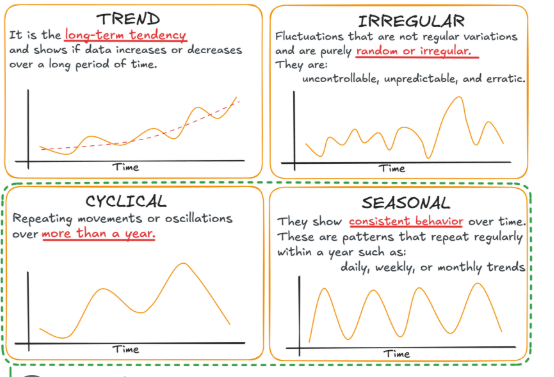

Time-series are generally of two types:
- **Additive time series**: 
  - Components (trend, seasonality, noise) are added to generate time series:
  - Time_series = trend + seasonality + noise
- **Multiplicative time series**: 
  - Components are multiplied to generate time series. One can notice an increase in the amplitude of seasonality in multiplicative time series
  - Time_series = trend * seasonality * noise

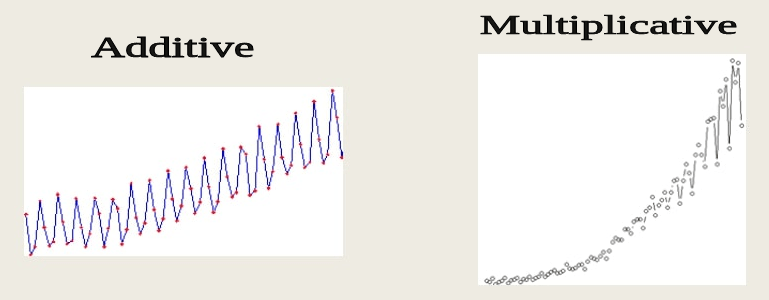


# Stationarity

Time series can be stationary and non-stationary.

Achieve stationarity: 
- Visual inspection to check
- Statistical tests: Augmented Dickey-Fuller (ADF) 
- Transformations: applying mathematical transformations like differencing (subtracting consecutive values) or log transformations to remove trends and stabilise variance.


## Stationary

Stationary time series are time series whose statistical properties (mean, variance, and autocorrelation) do not vary over time. 
- In simple terms, it looks the same regardless of when you observe it.
- A time series is stationary if it does not exhibit any long term trends or obvious seasonality. It has a constant variance and mean through time, and the statistical properties of the time series do not change. 
- Examples: 
  - White noise: a series where each value is a random number, independent of past values; 
  - Cyclic behaviour (if cycles are not fixed length): a series with repeating patterns, but the length of the cycles is not fixed 


## Non-stationary

**Non-stationary**
- Examples:
  - Time series with trends: a series where the mean is constantly increasing or decreasing over time
  - Time series with seasonality: a series with repeating patterns over fixed time intervals (e.g. sales data that spikes every December)

Below you can see an example of a time series that is not stationary, as it has **increasing trend** and it looks multiplicative (it's **variance is increasing**). 

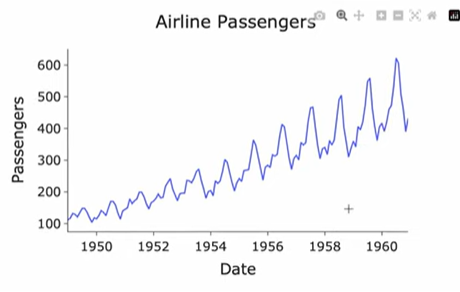


## Stationarity test

**Augmented Dickey-Fuller (ADF)**

Test whether a time series is seasonal or not.
- H0: the time series has a unit root, indicating it is non-stationary
- Ha: the time series is stationary
- p-value < 0.05 : reject the H0 -> this suggests that the time series is stationary. 
- p_value > 0.05 ; fail to reject the H0 -> the time series is non-stationary

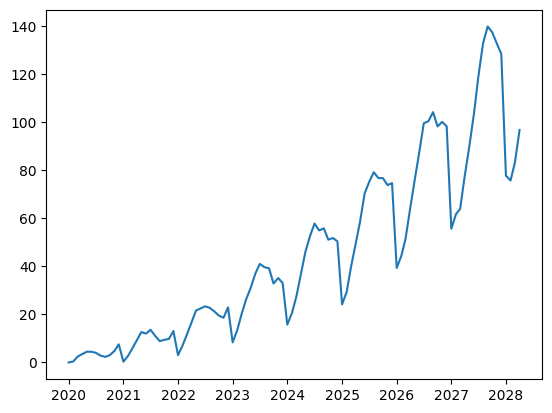

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn()  for i in range(100)]
data = [i*(i-i*0.99) for i in data]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
# display(time_series)
plt.plot(time_series)



In [68]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(time_series)


ADF Statistic: 6.027643723712469
P-value: 1.0
Critical Values:
 > 1%: -3.5078527246648834
 > 5%: -2.895382030636155
 > 10%: -2.584823877658872


# Metrics

Some metrics you can use for calculating error (coming from regression):
- MAE
- MSE
- RMSE

Some metrics are forecasting-specific:
- MAPE (percentage difference)
- SMAPE
- MSLE


## MAPE

MAPE (Mean Absolute Percentage Error)

$$
\text{MAPE} = \cfrac{1}{n} \sum\limits^{n}_{i=1} \left( 100 * \cfrac{|y_{i} - \hat{y_{i}}|}{y_{i}} \right)
$$


Advantages:
- Easy to interpret as percentage
- Scale independent

Disadvantages:
- Infinite error if the actual value is near zero
- Biased to under-forecast


## SMAPE

SMAPE (Symmetric MAPE).

$$
\text{SMAPE} = \cfrac{1}{n} \sum\limits^{n}_{i=1} \left( 200 * \cfrac{|y_{i} - \hat{y_{i}}|}{|y_{i}| + |\hat{y_{i}}|} \right)
$$

Advantages:
- No longer favours under forecasting

Disadvantages:
- Infinite error if the actual value is near zero
- Hard to interpret
- Not actually symmetric

## MSLE

MSLE (Mean Squared Logarithm Error) - measures the ratio of the relative difference.

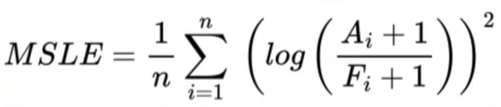




Advantages:
- Punishes under-forecasting

Disadvantages:
- Dividing by values that are close to zero
- Hard to interpret


# Transformations

2020-01-01      0.002752
2020-02-01      0.866133
2020-03-01      2.005706
2020-04-01      3.933311
2020-05-01      4.524155
                 ...    
2027-12-01    130.174586
2028-01-01     78.596155
2028-02-01     81.441671
2028-03-01     87.118176
2028-04-01     96.165273
Freq: MS, Length: 100, dtype: float64

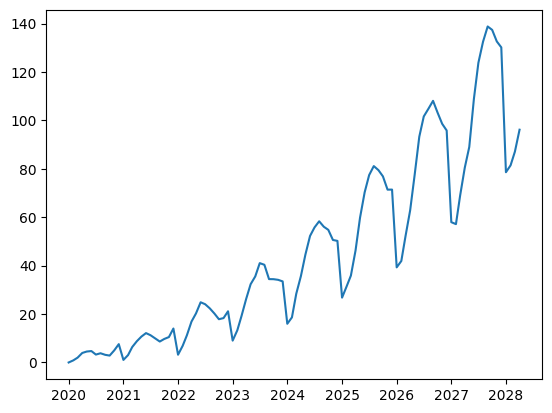

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn()  for i in range(100)]
data = [i*(i-i*0.99) for i in data]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
display(time_series)
plt.plot(time_series)

This is not-stationary data

In [70]:
def adf_test(series):
    test_results = adfuller(series)
    print(f"ADF Statistic: {test_results[0]}")
    print(f"P-value: {test_results[1]}")
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print(f" > {thres}: {adf_stat}")

adf_test(time_series)

ADF Statistic: 6.027643723712469
P-value: 1.0
Critical Values:
 > 1%: -3.5078527246648834
 > 5%: -2.895382030636155
 > 10%: -2.584823877658872


**Differencing**
- $d(t)$ is the difference at time $t$ between the series at points $y(t)$ and $y(t-1)$.
- Removes trends

$$
d(t) = y(t) - y(t-1)
$$


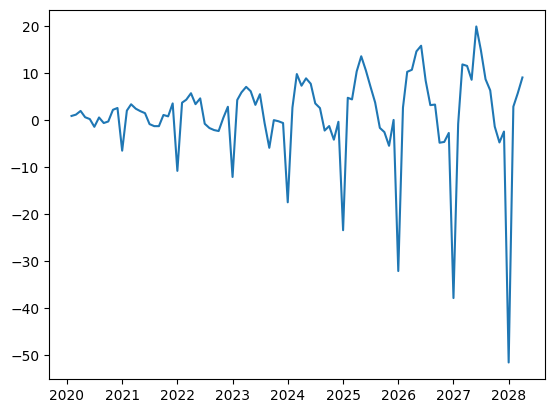

In [61]:
time_series1 = time_series.diff()
plt.plot(time_series1)

**Logarithm transform**
- Stabilises the variance


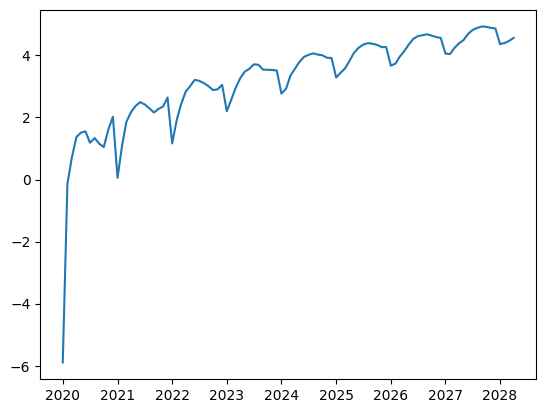

In [62]:
time_series2 = np.log(time_series)
plt.plot(time_series2)

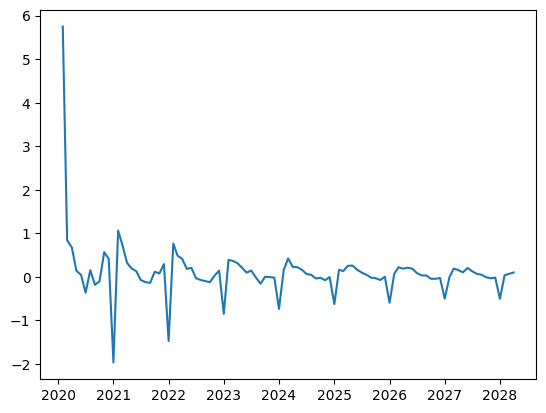

In [ ]:
# Now let's do logarithm and difference transform
# the data becomes (more or less) stationary
time_series3 = time_series2.diff()
plt.plot(time_series3)

In [74]:
adf_test(time_series3[~time_series3.isna()])

ADF Statistic: -3.26445561924463
P-value: 0.01654402261266142
Critical Values:
 > 1%: -3.5087828609430614
 > 5%: -2.895783561573195
 > 10%: -2.5850381719848565


## Box-Cox Transform

# Models

Types of time series forecasting models.


## Statistical Models

- **Naive Methods**:
  - Forecast = last observed value (or seasonal equivalent)
- **Moving Average (MA)**
  - Forecast is the average of the last n observations
- **Exponential Smoothing**
  - Gives more weight to more recent data by assigning exponentially decreasing weights to older observations, giving more weight to recent data
  - Includes:
    - **Simple Exponential Smoothing**: 
      - Just forecasts the level of the time series; 
      - Does NOT take into account trend or seasonality;
    - **Holt's Linear Trend Method**:
      - a.k.a. double exponential smoothing
      - Incorporates the trend as well as the level
    - **Holt-Winters Method**
      - a.k.a. triple exponential smoothing
      - Adds seasonality)
- **ARIMA (Autoregressive Integrated Moving Average)**
  - A versatile model that captures autoregressive, integrated, and moving average components of a time series.
  - Combines autoregression (AR), differencing (I), and moving average (MA).
  - Good for non-seasonal data.
- **SARIMA (Seasonal ARIMA)**
  - An extension of ARIMA that incorporates seasonal components
  - Can be used for seasonal data
- **SARIMAX (Seasonal ARIMA with Exogenous Regressors)**
  - Extends SARIMA, accounts for seasonality and external factors. Can accommodate both autoregressive and moving average components; 

### Basic forecasting methods

144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 1.0, 'Time series data')

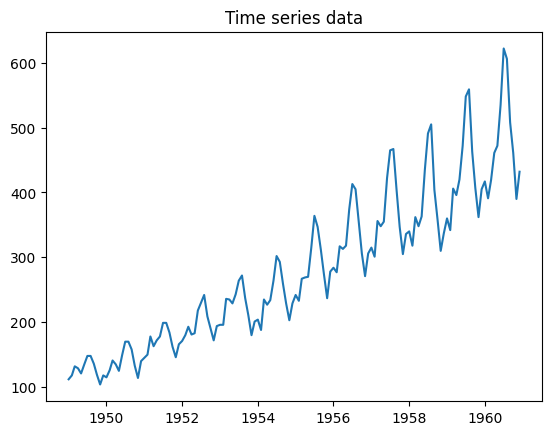

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())
# Plot the initial data
plt.plot(
    df['Month'],
    df['#Passengers']
)
plt.title('Time series data')

In [94]:
# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.8)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")



Total data points: 144
> Train: 115
> Test: 29



In [95]:
def plot_predictions(
    df_train: pd.DataFrame,
    df_test: pd.DataFrame,
    df_predictions: pd.DataFrame,
    title: str
):
    """Plot."""
    train, test, predictions = df_train.copy(deep=True), df_test.copy(deep=True), df_predictions.copy(deep=True)
    train['data split'] = 'Train'
    test['data split'] = 'Test'
    predictions['data split'] = 'Prediction'
    sns.lineplot(
        data = pd.concat([train, test, predictions]),
        x = 'Month',
        y = '#Passengers',
        hue = 'data split'
    )
    plt.title(title)
    plt.show()
    return None


**Average forecast**

This model simply assumes that all future values are equal to the mean of all the previous observations.

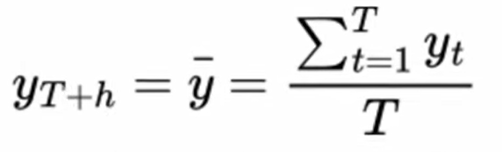

,Month,#Passengers
115,1958-08-01,239.947826
116,1958-09-01,239.947826
117,1958-10-01,239.947826


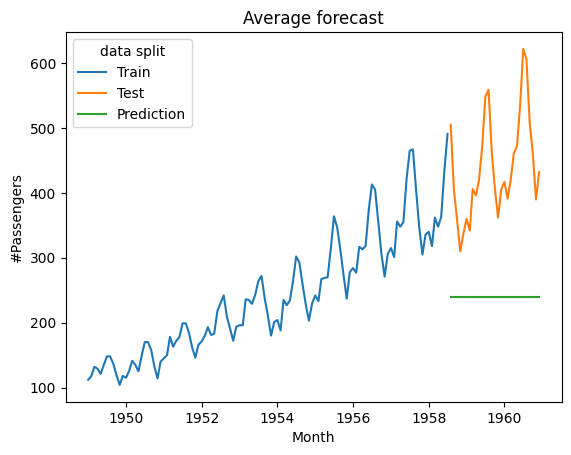

In [ ]:
df_train, df_test = train_test_split(df)

average_forecast = df_train['#Passengers'].mean()
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = average_forecast
display(df_predictions.head(3))

plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Average forecast'
)


**Naive forecast**

Setting the future forecast equal to the latest observed value.

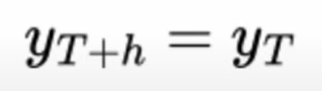

,Month,#Passengers
115,1958-08-01,491
116,1958-09-01,491
117,1958-10-01,491


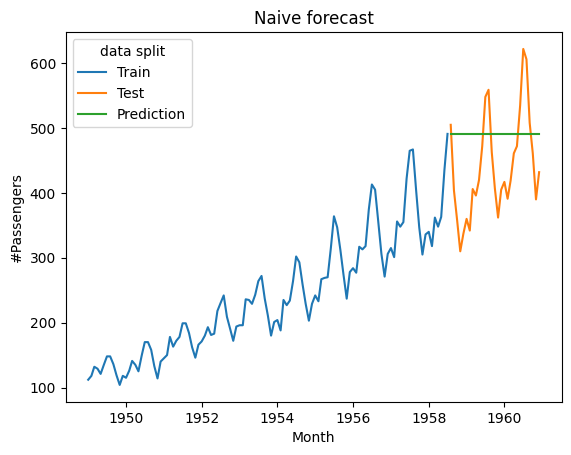

In [ ]:
df_train, df_test = train_test_split(df)

naive_forecast = df_train['#Passengers'].iloc[-1] # 114 \ 1958-07-01 \ 491
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = naive_forecast
display(df_predictions.head(3))

plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Naive forecast'
)


**Seasonal naive forecast**

Take the latest-available data from the train data but m months back.
Can be:
- m = 12: 12 months back
- m = 4: a quarter back
- m = 52: weekly data
Take the previous month from train data.

Can capture seasonality, but not the trend.

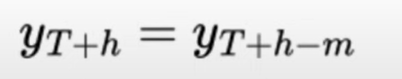

In [ ]:
df_train, df_test = train_test_split(df)

In [100]:
# Proc df_train_lag
df_train = df_train.copy(deep=True)
df_train['month_day'] = df_train['Month'].dt.month
df_train


,Month,#Passengers,month_day
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5
...,...,...,...
110,1958-03-01,362,3
111,1958-04-01,348,4
112,1958-05-01,363,5
113,1958-06-01,435,6


In [106]:
df_train.query("month_day == 1")['#Passengers'].iloc[-1]

340

In [111]:
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['month_day'] = df_predictions['Month'].dt.month

def get_train_month(x):
    return df_train.query(f"month_day == {x}")['#Passengers'].iloc[-1]

df_predictions['#Passengers'] = df_predictions['month_day'].apply(
    lambda x: get_train_month(x)
)
df_predictions = df_predictions.drop(['month_day'], axis=1)
df_predictions

,Month,#Passengers
115,1958-08-01,467
116,1958-09-01,404
117,1958-10-01,347
118,1958-11-01,305
119,1958-12-01,336
120,1959-01-01,340
121,1959-02-01,318
122,1959-03-01,362
123,1959-04-01,348
124,1959-05-01,363


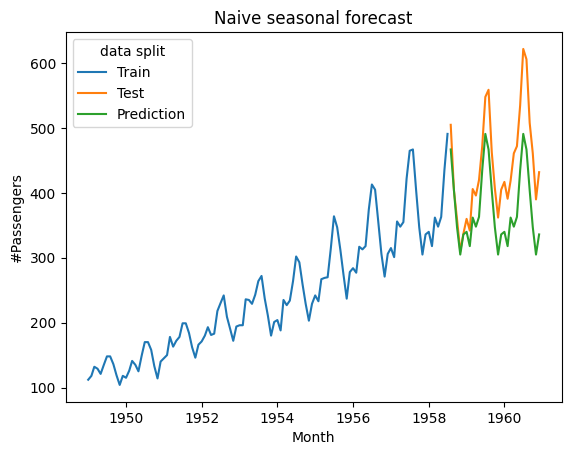

In [112]:
plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Naive seasonal forecast'
)

**Drift forecast model**

- It's an extension of the naive forecast
- so the basic idea is drawing a straight line from the first to last point and extending it forwards through time

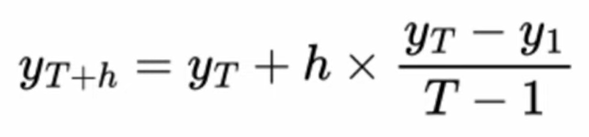


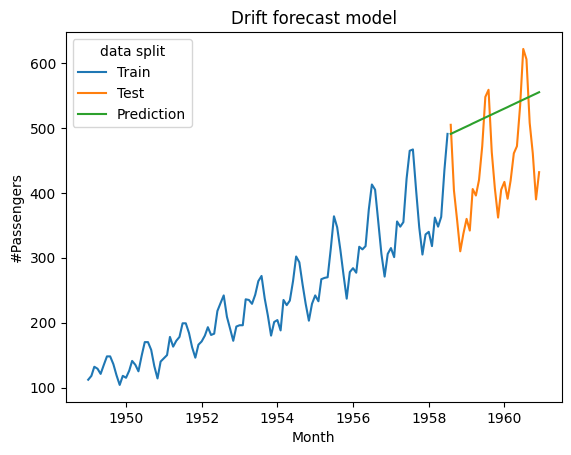

In [ ]:
df_train, df_test = train_test_split(df)
constant = (
    df_train['#Passengers'].iloc[-1] - \
    df_train['#Passengers'].iloc[0]
) / len(df_train) - 1
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['h'] = range(len(df_predictions))
df_predictions['#Passengers'] = df_train['#Passengers'].iloc[-1] + df_predictions['h'] * constant
plot_predictions(
    df_train,
    df_test,
    df_predictions,
    'Drift forecast model'
)

### Simple Exponential Smoothing

It's simple because it doesn't take into account trend or seasonality, iow, it's a horisontal line. 

$\alpha$ - smoothing parameter; $0 \le \alpha \le 1$

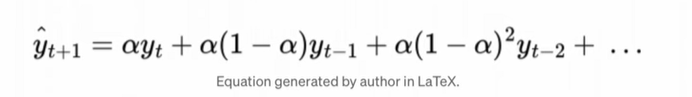

Notice that if $\alpha = 1$, it converts into naive forecast model.

144


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121



Total data points: 144
> Train: 115
> Test: 29



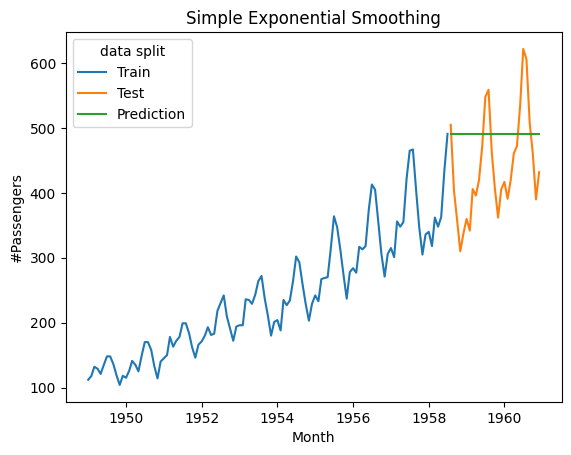

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from importlib import reload

from utils.time_series import plot_predictions

# Read data
df = pd.read_csv('my_datasets/time-series/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(len(df))
display(df.head())

# Split train and test
def train_test_split(df):
    num_train_split = int(len(df) * 0.8)
    df_train = df.iloc[:num_train_split]
    df_test = df.iloc[num_train_split:]
    return df_train, df_test

df_train, df_test = train_test_split(df)
print(f"""
Total data points: {len(df)}
> Train: {len(df_train)}
> Test: {len(df_test)}
""")

# Fit model
model = SimpleExpSmoothing(df_train['#Passengers']).fit(optimized=True)
forecasts = model.forecast(len(df_test))
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Simple Exponential Smoothing'
)

In [9]:
# Notice that smoothing_level (alpha) = 1, meaning that the best model fitted to this data
# (according to auto-determine) is naive model!
model.summary()

Dep. Variable:,#Passengers,No. Observations:,115
Model:,SimpleExpSmoothing,SSE,82599.001
Optimized:,True,AIC,760.334
Trend:,None,BIC,765.824
Seasonal:,None,AICC,760.698
Seasonal Periods:,None,Date:,"Fri, 17 Oct 2025"
Box-Cox:,False,Time:,20:24:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,112.00000,l.0,False


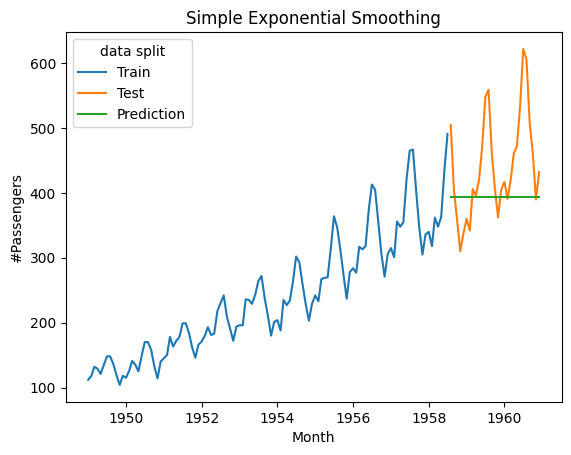

In [3]:
# We can also manually set an alpha
model = SimpleExpSmoothing(df_train['#Passengers']).fit(
    smoothing_level=0.2,
    optimized=False
)
forecasts = model.forecast(len(df_test))
df_predictions = df_test.copy(deep = True).drop(['#Passengers'], axis = 1)
df_predictions['#Passengers'] = forecasts

plot_predictions(
    'Month',
    '#Passengers',
    df_train, 
    df_test,
    df_predictions,
    'Simple Exponential Smoothing'
)

### Holt's Linear Model

1957, Charles Holt extended the Simple Exponential Smoothing model to include a trend component, $b_{t}$.

On top of Simple Exponential Smoothing's level, also incorporates trend.

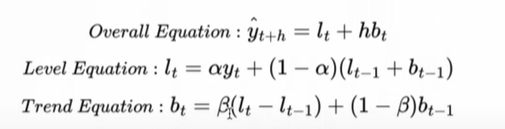

$\beta$ - trend smoothing factor; $0 \le \beta \le 1$


## ML / DL models

- Linear regression
- Random Forest / Gradient Boosting
- Support Vector Regression

- RNNs
- LSTM
- GRU
- TCN
- Transformer-based models

## Hybrid models

Combine statistical and ML/DL models.

Examples:
- ARIMA + XGBoost
- LSTM + Prophet



## Specialised tools

**Specialised tools**

- Facebook's **Prophet**: designed for forecasting time series data with strong seasonality and trend components;
- **NeuralProphet**: combines Prophet with NNs;
- **GluonTS / Darts / Kats**: libraries for advanced time series modeling; 


# Some examples

## Example 1

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

2020-01-01     0.917990
2020-02-01     7.692842
2020-03-01    13.962133
Freq: MS, dtype: float64
2028-02-01    90.434416
2028-03-01    92.742838
2028-04-01    97.843157
Freq: MS, dtype: float64


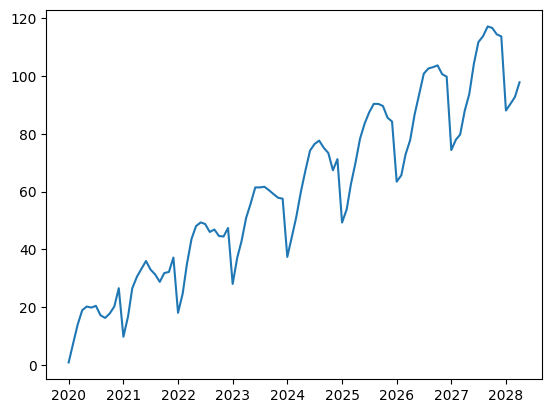

In [89]:
# Create dummy data that has upward trend + seasonality
data = [i + (i%12)*2 + 10*np.sin(i/2) + np.random.randn() for i in range(100)]
index = pd.date_range(start='2020-01-01', periods=100, freq='MS')
time_series = pd.Series(
    data, 
    index=index
)
print(time_series.head(3))
print(time_series.tail(3))
plt.plot(time_series)

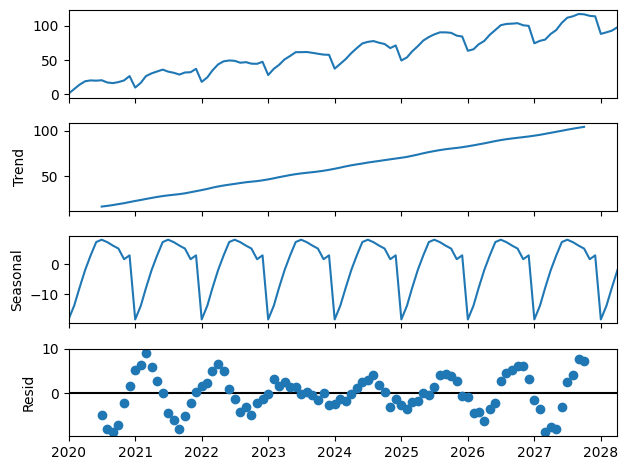

In [90]:
decomposition = seasonal_decompose(time_series, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [91]:
# Test of Augmented Dickey Fuller:
print(f'T-test: {adfuller(time_series)[0]}')
p_value = adfuller(time_series)[1]
print(f'P-value: {p_value:.3f}')
if p_value < 0.05:
    print(f"> Reject the H0. Time series seems to be stationary.")
else:
    print(f"> Fail to reject the H0. Time series seems to be non-stationary.")

T-test: -0.26846714768815894
P-value: 0.930
> Fail to reject the H0. Time series seems to be non-stationary.


In [ ]:
# Let's separate the data into train and test
train = time_series.loc[
    time_series.index[0] : 
    time_series.index[int(len(time_series)*0.8)]
]

test = time_series.loc[
    time_series.index[int(len(time_series)*0.8)] :
] 

train_start = train.head(1).index[0].strftime("%Y-%m-%d")
train_end   = train.tail(1).index[0].strftime("%Y-%m-%d")
test_start  = test.head(1).index[0].strftime("%Y-%m-%d")
test_end    = test.tail(1).index[0].strftime("%Y-%m-%d")
print(f"Train: from {train_start} to {train_end}")
print(f"Test: from {test_start} to {test_end}")

Train: from 2020-01-01 to 2026-09-01
Test: from 2026-09-01 to 2028-04-01


c:\Users\evgen\.conda\envs\data-science-2\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


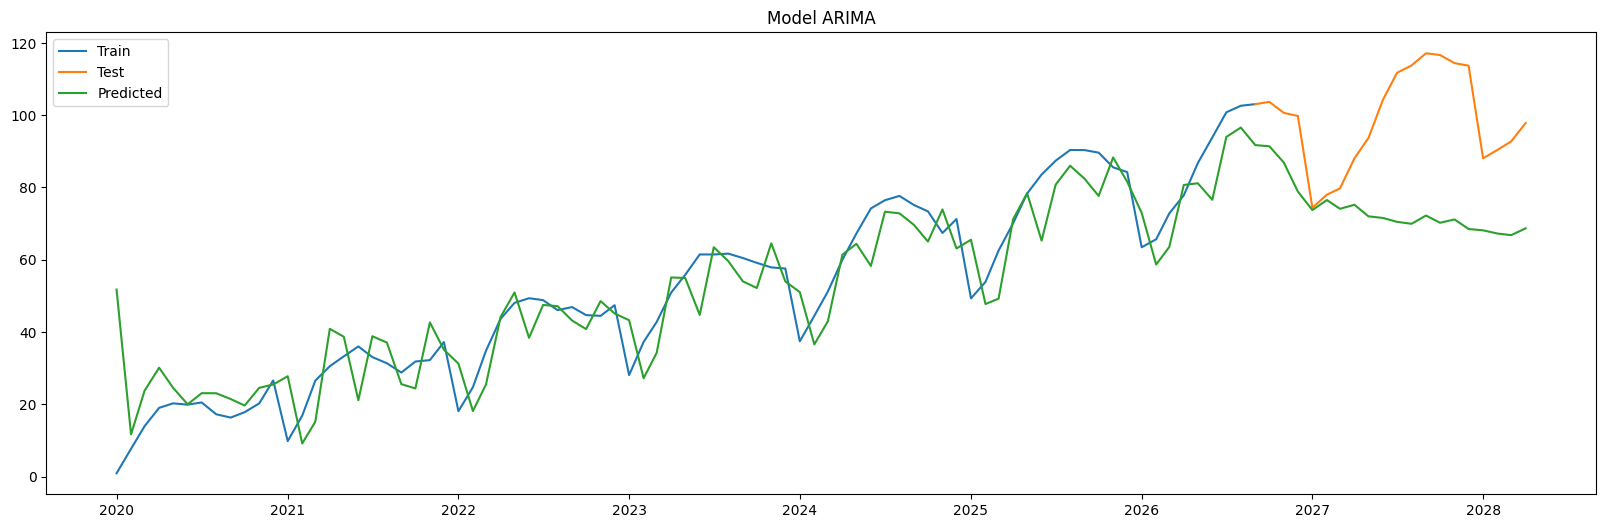

In [ ]:
# First, let's train ARIMA model
model_arima = ARIMA(train, 
                    order=(0, 0, 3),
                    seasonal_order=(1, 0, 1, 7)
).fit()

pred_model_arima = model_arima.predict(start=train_start, end=test_end)

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_arima)
plt.title('Model ARIMA')
plt.legend(['Train', 'Test', 'Predicted'])

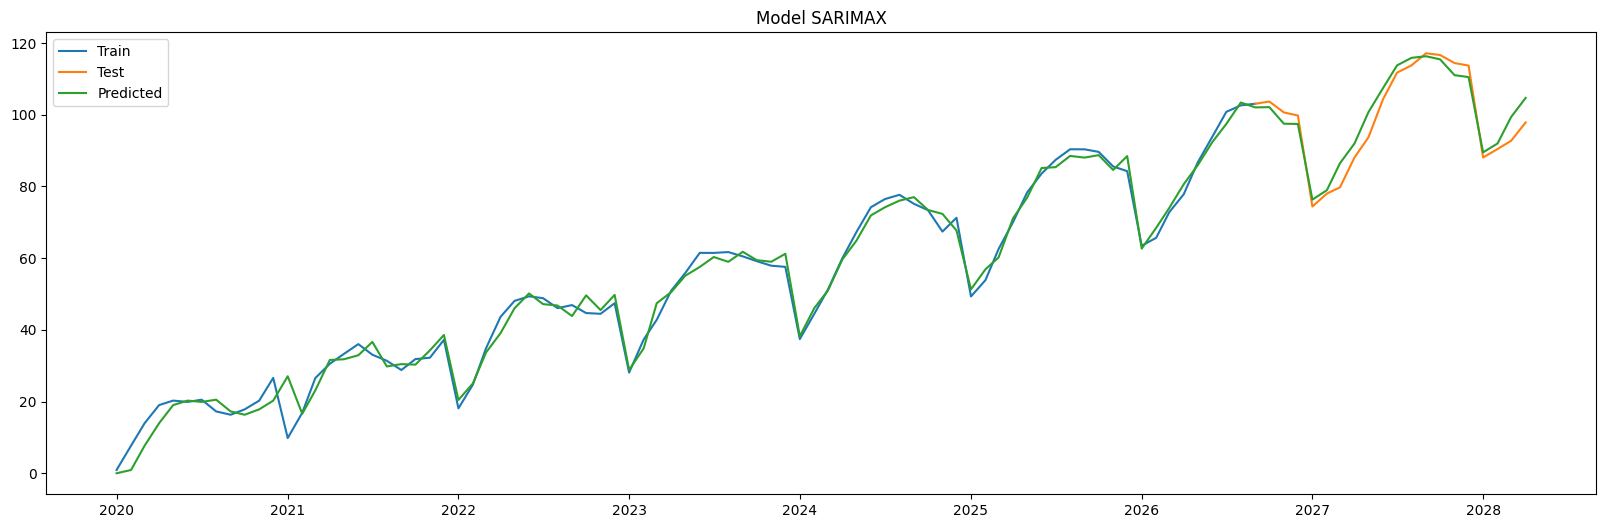

In [ ]:
# Now, let's train SARIMAX
model_sarimax = SARIMAX(train, 
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 12)
).fit(disp=False)

pred_model_sarimax = model_sarimax.predict(start='2020-01-01', end='2028-04-01')

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)
plt.plot(pred_model_sarimax)
plt.title('Model SARIMAX')
plt.legend(['Train', 'Test', 'Predicted'])


## Example 2

Holt-Winters methods.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Create a sample time series with trend and seasonality
date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')
data = 10 + 0.5 * np.arange(48) + 5 * np.sin(2 * np.pi * np.arange(48) / 12) + np.random.normal(0, 1, 48)
df = pd.DataFrame({
    'Date': date_range, 
    'Value': data
})
df.set_index('Date', inplace=True)
df['Type'] = 'Real'
df

C:\Users\Evgeni Zorin\AppData\Local\Temp\ipykernel_29768\874070761.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start = '2020-01-01', periods = 48, freq = 'M')


,Value,Type
Date,,
2020-01-31,10.003345,Real
2020-02-29,12.984252,Real
2020-03-31,16.494071,Real
2020-04-30,18.212886,Real
2020-05-31,17.272413,Real
2020-06-30,13.727654,Real
2020-07-31,13.523601,Real
2020-08-31,12.475205,Real
2020-09-30,12.039625,Real


<Axes: xlabel='Date', ylabel='Value'>

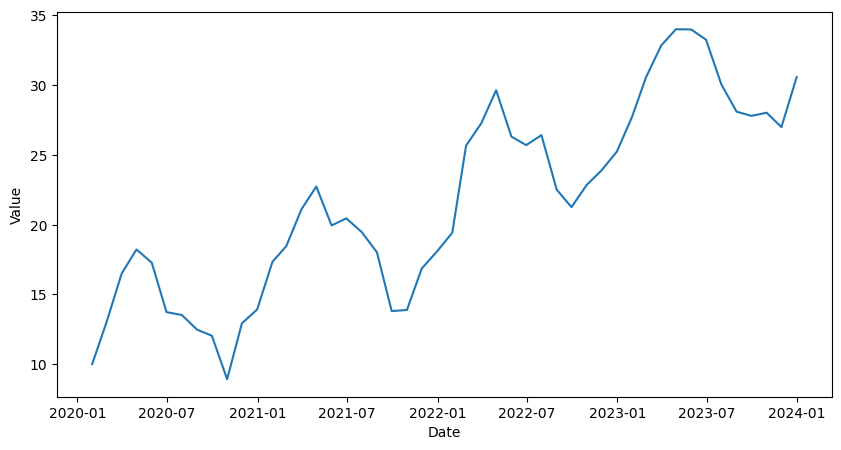

In [3]:
plt.figure(figsize=(10,5))
sns.lineplot(
    x = df.index, 
    y = df['Value']
)

C:\Users\Evgeni Zorin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='None', ylabel='Value'>

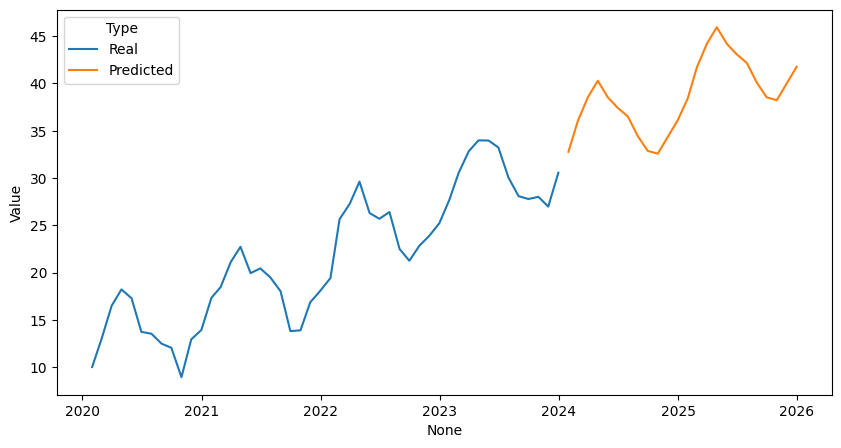

In [6]:
model = ExponentialSmoothing(
    df['Value'],
    trend = 'add',
    seasonal = 'add',
    seasonal_periods = 12
)
fit = model.fit()

# Forecast next 24 months
forecast = fit.forecast(24)
# Combine actual and forecast
forecast = forecast.to_frame(name = 'Value')
forecast['Type'] = 'Predicted'
combined = pd.concat(
    [df, forecast],
    axis = 'rows'
)
plt.figure(figsize=(10,5))
sns.lineplot(
    x = combined.index,
    y = combined['Value'],
    hue = combined['Type']
)
